# Loading CT data

These are the recordings, one per ear and each with a "parsed" file of concentrations* and a file for distances between the measured locations (ROIs).

\* We measure CT or MR signal, which we'll assume is proportional to concentrations and therefore as good as concentrations for our purposes.

Below, I first make a table of the CT scans, and then load a particular scan.

In [2]:
import pandas as pd
import numpy as np
from os import listdir, path

import matplotlib.pyplot as plt

import sys
sys.path.append(path.abspath("../src/"))
from parsingCTandMR import *

In [3]:
datadir = "../../data/parsed/CT/"
CT_conc_files = sorted([l for l in listdir(datadir) if "parsed" in l])
CT_distance_files = sorted([l for l in listdir(datadir) if "distan" in l])
ear_IDs = [fn.split("_parsed")[0] for fn in CT_conc_files]

CT_datafiles = pd.DataFrame({"ID": ear_IDs, "conc": CT_conc_files, "dist": CT_distance_files})
CT_datafiles

,ID,conc,dist
0,20210120_m1_l,20210120_m1_l_parsed.csv,20210120_m1_l_distances.csv
1,20210120_m1_r,20210120_m1_r_parsed.csv,20210120_m1_r_distances.csv
2,20210120_m2_l,20210120_m2_l_parsed.csv,20210120_m2_l_distances.csv
3,20210120_m2_r,20210120_m2_r_parsed.csv,20210120_m2_r_distances.csv
4,20210120_m3_l,20210120_m3_l_parsed.csv,20210120_m3_l_distances.csv
5,20210120_m3_r,20210120_m3_r_parsed.csv,20210120_m3_r_distances.csv
6,20210120_m4_l,20210120_m4_l_parsed.csv,20210120_m4_l_distances.csv
7,20210120_m4_r,20210120_m4_r_parsed.csv,20210120_m4_r_distances.csv
8,20210120_m6_l,20210120_m6_l_parsed.csv,20210120_m6_l_distances.csv
9,20210120_m6_r,20210120_m6_r_parsed.csv,20210120_m6_r_distances.csv


In [4]:
time, microndistances, concentrations = loadear_CA_ST(datadir, "20210120_m6_l")

We can plot the data for specific regions of interst (locations) over time, or plot all the regions over space.

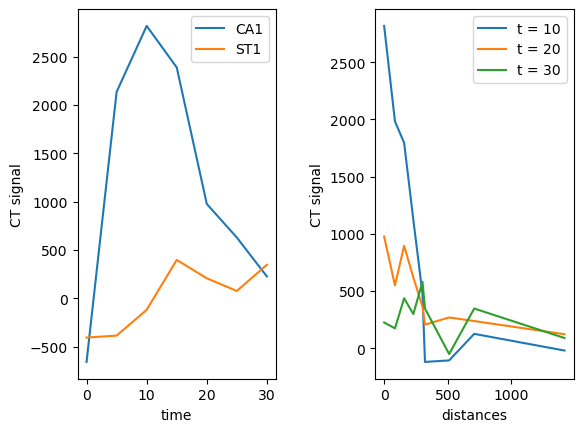

In [5]:
fig, axes = plt.subplots(ncols=2)

ax = axes[0]
ax.plot(time, concentrations.loc[:, "CA1"], label="CA1")
ax.plot(time, concentrations.loc[:, "ST1"], label="ST1")
ax.set_xlabel("time")
ax.set_ylabel("CT signal")
ax.legend()

ax = axes[1]
timeindex = 2
ax.plot(microndistances, concentrations.iloc[timeindex, :].values, label=f"t = {time[timeindex]}")
timeindex = 4
ax.plot(microndistances, concentrations.iloc[timeindex, :].values, label=f"t = {time[timeindex]}")
timeindex = 6
ax.plot(microndistances, concentrations.iloc[timeindex, :].values, label=f"t = {time[timeindex]}")
ax.set_xlabel("distances")
ax.set_ylabel("CT signal")
ax.legend()

plt.subplots_adjust(wspace=0.5)
plt.show()